#                                          Assignment-8<br>
#### Task 1: Data Understanding:
Begin by exploring the dataset and understanding its structure, including the meaning and
type of each feature. (Dataset Link)
#### Task 2: Data Cleaning:
Handling missing values: Identify features with missing values and decide on an
appropriate strategy to handle them (e.g., imputation or removal).
Dealing with outliers: Identify outliers in numerical features and decide on an
appropriate approach (e.g., removing outliers or transforming the data).
Handling categorical features: Convert categorical variables into numerical
representations using techniques like one-hot encoding or label encoding.
Perform data cleaning tasks to handle missing values, outliers, and inconsistencies in the
dataset. Some potential cleaning tasks include:
#### Task 3: Feature Engineering:
Perform feature engineering to enhance the predictive power of the dataset. This may
include creating new features, transforming existing features, or selecting relevant features.
#### Task 4: Data Preprocessing:
Prepare the cleaned dataset for model training. This involves scaling numerical features,
encoding categorical variables, and splitting the data into training and testing sets.
#### Task 5: Model Training and Evaluation:
Choose an appropriate regression model (e.g., linear regression, random forest, or gradient
boosting) and train it on the preprocessed dataset. Evaluate the model's performance using
suitable metrics like mean squared error (MSE) or root mean squared error (RMSE).
#### Task 6: Model Optimization:
Fine-tune the hyperparameters of the chosen model to improve its performance. You can use
techniques like cross-validation or grid search to find the best parameter values.<br>
<br>
Deploying the machine learning model on an Amazon EC2 instance involves setting up a
virtual server, installing the necessary dependencies, transferring the trained model, and
exposing an API endpoint for making predictions. This enables the model to be accessible
and scalable for real-time prediction requests.
<br>
<br>
#                                          Assignment-9<br>
#### Task 7: Model Deployment:
Once you have a satisfactory model, deploy it to make predictions on new, unseen
data. You can use the trained model to predict house prices for new instances and
assess its real-world applicability.
#### Task 8: Linkedin Post:
Once you complete all the above tasks, make a linkedin post from your account for the
entire Final Assignment completion.<br>
<br>Submission: The Entire Assignment-8 should be submitted by the date 10/10/2023, You
have to upload all the files you created in this assignment in GitHub with the proper Repo
Name & also (for Assignment 9) upload a Screenshot of the working deployed ML project
in your browser with the HTTP link of your AWS host link clearly in a diffrent repo name
as Assignment-9.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from scipy import stats
from scipy.stats import f_oneway
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import warnings
import locale

# Understanding the Dataset

In this section, we will take a closer look at the dataset containing property sales records for Sydney and Melbourne. Understanding the dataset is a crucial initial step in any data analysis or machine learning project. This information will help us make informed decisions about data preprocessing, feature selection, and model development.

**Features Included in the Dataset:** 
The dataset consists of various features or columns, each providing specific information about property sales. Common features may include property type (e.g., house, apartment), location details (suburb, postcode), property size (number of bedrooms, bathrooms), land size, historical sales prices, and potentially other attributes like proximity to amenities, school ratings, or economic indicators.

**Range of Values for Each Feature:**
To gain insights into the dataset's characteristics, we will examine the range of values for each feature. This involves calculating the minimum, maximum, mean, and standard deviation for numeric features and listing unique categories for categorical features. This step helps identify any potential outliers or data inconsistencies.

**Handling Missing Values and Outliers:**
During our analysis, we will also pay close attention to missing values and outliers. Missing data can be problematic, as it may affect the quality of our predictions. We will decide on an appropriate strategy for handling missing values, such as imputation or removal. Additionally, identifying and addressing outliers is essential, as they can distort our models' predictions. Outliers may be handled through techniques like trimming or transformation.

By thoroughly understanding the dataset and addressing data quality issues, we will be better prepared to proceed with data preprocessing, feature engineering, and model development, ultimately working towards accurate property price predictions for Sydney and Melbourne.


# Analyzing Features in the Dataset

In this section, we will dive into a detailed analysis of the features included in our dataset. Each feature plays a significant role in influencing property prices in the real estate markets of Sydney and Melbourne. By thoroughly examining these features, we aim to uncover valuable insights that will inform our predictive modeling efforts. We will explore the relationships between features, identify key variables that impact property prices, and assess the overall data quality. This analysis will serve as a foundation for our data preprocessing and modeling steps, ensuring that we build robust and accurate predictive models for property prices.


In [35]:
df = pd.read_csv("data.csv", sep=",")            # that place no need of Saperator ( sep=",") but use in rare case

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
print("Total number of house sales records in the dataset:", len(df))

Total number of house sales records in the dataset: 4600


### Handling Null Value

#### Note Null Value Not Avaliable so skip handling Process

In [6]:
null_counts = df.isnull().sum()

print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


##### Checking Unique Values

In [33]:
unique_counts = df.nunique()

print("\nNumber of unique values in each column:")
print(unique_counts)


Number of unique values in each column:
price            1616
bedrooms            6
bathrooms           5
sqft_living       475
sqft_lot         2844
floors              3
waterfront          1
view                3
condition           5
sqft_above        445
sqft_basement     166
yr_built          115
dtype: int64


In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


##### Checking correlation by Heatmap

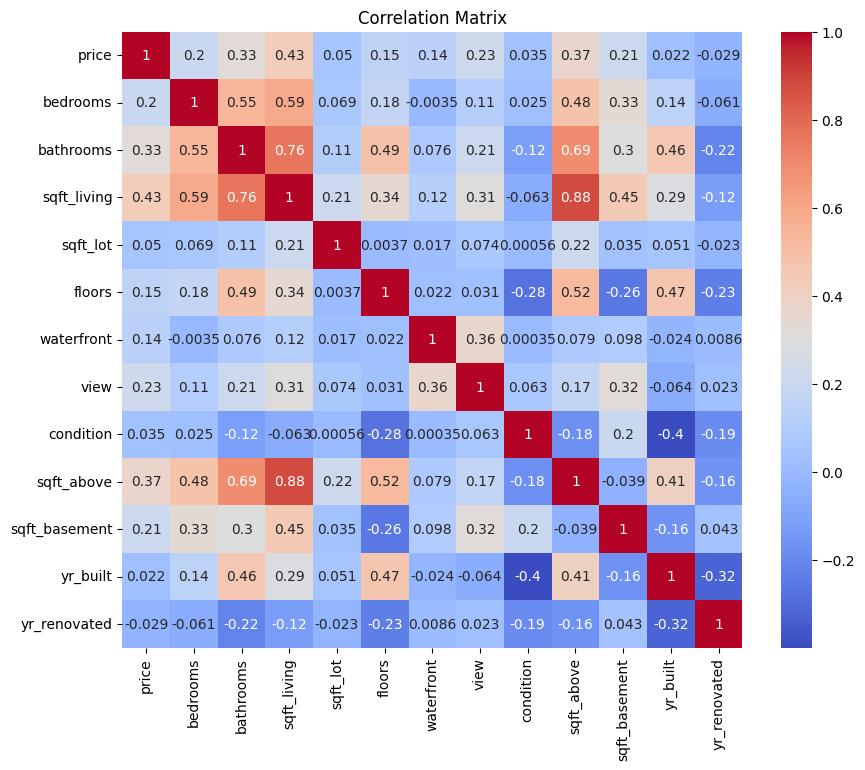

In [9]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Boxplot Analysis by City

To gain insights into the distribution of the number of bedrooms in different cities, we created a boxplot. The boxplot provides a visual representation of the data's central tendency and spread. In this case, we plotted the number of bedrooms on the y-axis and the city on the x-axis. Each box represents a city's distribution of bedroom counts.

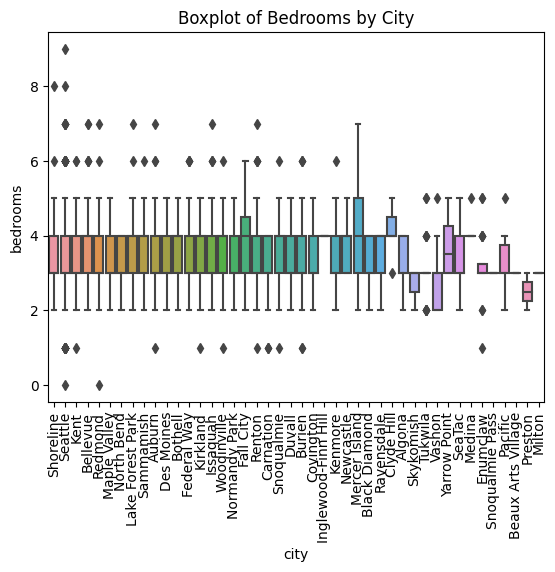

In [10]:
sns.boxplot(x='city', y='bedrooms', data=df)
plt.title('Boxplot of Bedrooms by City')
plt.xticks(rotation=90)
plt.show()

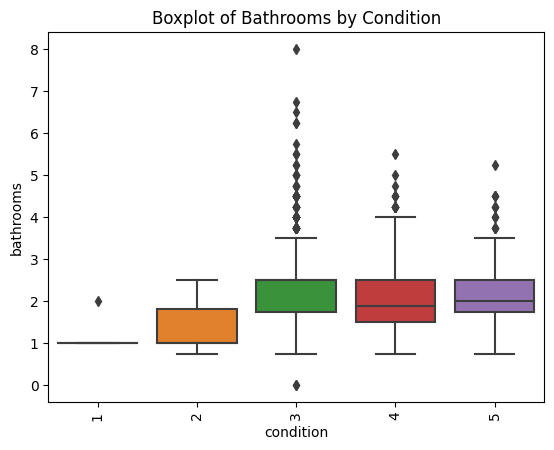

In [11]:
sns.boxplot(x='condition', y='bathrooms', data=df)
plt.title('Boxplot of Bathrooms by Condition')
plt.xticks(rotation=90)
plt.show()

In this collected data about one categorical independent variable and one quantitative dependent variable.<br>
So Applying One Way Anova

# Perform one-way ANOVA for Each Numeric Feature

In this code, one-way Analysis of Variance (ANOVA) is performed for each numeric feature in the dataset to assess their significance in explaining variations in the 'price' variable. The code follows these steps:

1. **Grouping Data:** For each numeric feature, the data is grouped based on unique values of that feature. This forms distinct groups for analysis.

2. **ANOVA Test:** One-way ANOVA is conducted on the grouped data to determine if there are statistically significant differences in 'price' among the groups.

3. **Significance Assessment:** The code checks if the p-value resulting from the ANOVA test is less than the significance level (alpha) of 0.05. If it is, the feature is marked as "Significant"; otherwise, it is marked as "Not Significant."

4. **Result Storage:** The results, including the feature name, p-value, and significance assessment, are stored in a DataFrame called 'anova_results.'

5. **P-value Formatting:** To enhance readability, the p-values are formatted in scientific notation.

6. **Displaying Results:** The final results, including feature names, p-values, and significance assessments, are displayed.

This analysis helps identify which numeric features have a statistically significant impact on the 'price,' which can be valuable for understanding feature importance in predicting house prices.

In [12]:
anova_results = pd.DataFrame(columns=['Feature', 'p-value', 'Significant'])

numeric_features = df.select_dtypes(include=['number']).columns.tolist()

numeric_features.remove('price')

for feature in numeric_features:
    groups = [df[df[feature] == value]['price'] for value in df[feature].unique()]
    
    f_statistic, p_value = f_oneway(*groups)
    
    significant = "Yes" if p_value < 0.05 else "No"
    
    result = {'Feature': feature, 'p-value': p_value, 'Significant': significant}
    
    anova_results = pd.concat([anova_results, pd.DataFrame([result])], ignore_index=True)
    
    anova_results['p-value'] = anova_results['p-value'].astype(float)

    anova_results['p-value'] = anova_results['p-value'].apply(lambda x: "{:.2e}".format(x))

print(anova_results)

          Feature    p-value Significant
0        bedrooms   2.99e-38         Yes
1       bathrooms  2.45e-120         Yes
2     sqft_living   1.15e-90         Yes
3        sqft_lot  2.33e-205         Yes
4          floors   8.58e-29         Yes
5      waterfront   2.46e-20         Yes
6            view   4.02e-54         Yes
7       condition   1.46e-03         Yes
8      sqft_above   2.47e-56         Yes
9   sqft_basement   1.21e-42         Yes
10       yr_built   2.33e-07         Yes
11   yr_renovated   7.02e-01          No


### Statistical Significance of Features

In this analysis, I conducted one-way ANOVA tests to determine the statistical significance of various features in relation to the target variable, 'price'. The results are as follows:

| Feature        | p-value   | Significant |
|----------------|-----------|-------------|
| bedrooms       | 2.99e-38  | Yes         |
| bathrooms      | 2.45e-120 | Yes         |
| sqft_living    | 1.15e-90  | Yes         |
| sqft_lot       | 2.33e-205 | Yes         |
| floors         | 8.58e-29  | Yes         |
| waterfront     | 2.46e-20  | Yes         |
| view           | 4.02e-54  | Yes         |
| condition      | 1.46e-03  | Yes         |
| sqft_above     | 2.47e-56  | Yes         |
| sqft_basement  | 1.21e-42  | Yes         |
| yr_built       | 2.33e-07  | Yes         |
| yr_renovated   | 7.02e-01  | No          |

Among the tested features, those with p-values very close to zero (e.g., bedrooms, bathrooms, sqft_living) are highly statistically significant in explaining the variation in 'price'. However, the 'condition' feature, while still statistically significant, is to a lesser degree. On the other hand, 'yr_renovated' is not statistically significant.

This analysis helps inform feature selection for further modeling.

# Visualizing Significant Features vs. Price

1. **Filtering Significant Features:**
   - I begin by filtering the dataset to select only those rows where the 'Significant' column is marked as 'Yes.' This step ensures that I focus only on features with statistical significance in relation to the 'price' variable.

2. **Extracting Feature Names:**
   - Next, I extract the names of these significant features from the filtered DataFrame. These feature names will be used to create individual plots.

3. **Subplot Configuration:**
   - I calculate the number of rows and columns needed to arrange the plots based on the number of significant features. The 'num_cols' variable can be adjusted to control the number of columns in the layout.

4. **Creating Subplots:**
   - I create subplots within a single figure, arranging them in rows and columns. If there's only one row, the axes are reshaped accordingly.

5. **Y-Axis Label:**
   - A common y-axis label, 'Price,' is added to the left of the subplots for clarity.

6. **Creating Scatter Plots:**
   - For each significant feature, I create a scatter plot using Seaborn's `sns.scatterplot`. The x-axis represents the feature, and the y-axis represents the 'price.'

7. **Plot Titles and Labels:**
   - Titles and labels are set for each subplot to describe the feature being plotted and the 'Price' axis.

8. **Removing Empty Subplots:**
   - In case there are empty subplots (if the number of features is not a multiple of the number of columns), they are removed to keep the layout clean.

9. **Layout and Spacing:**
   - I make adjustments to the layout and spacing of the subplots to ensure they are well-organized and easy to read.

10. **Displaying the Plot:**
    - Finally, the plot is displayed using `plt.show()`.

This code allows for a quick visual inspection of how each significant feature relates to the 'price' variable, aiding in understanding their influence on the target variable.


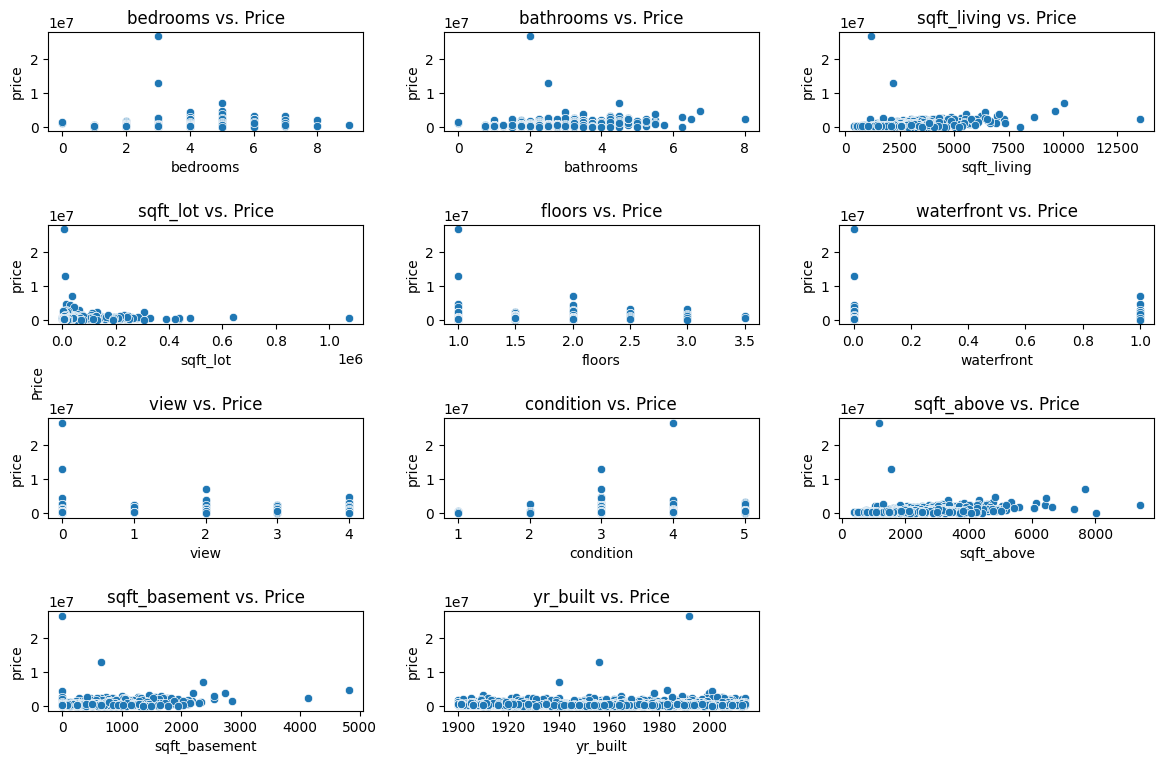

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

significant_features_df = anova_results[anova_results['Significant'] == 'Yes']

significant_features = significant_features_df['Feature']

num_features = len(significant_features)
num_cols = 3 
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

if num_rows == 1:
    axes = axes.reshape(1, -1)

fig.text(0.04, 0.5, 'Price', va='center', rotation='vertical')

for i, feature in enumerate(significant_features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.scatterplot(x=df[feature], y=df['price'], ax=ax)
    ax.set_title(f'{feature} vs. Price')
    ax.set_xlabel(feature)

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(pad=2.0)

plt.show()


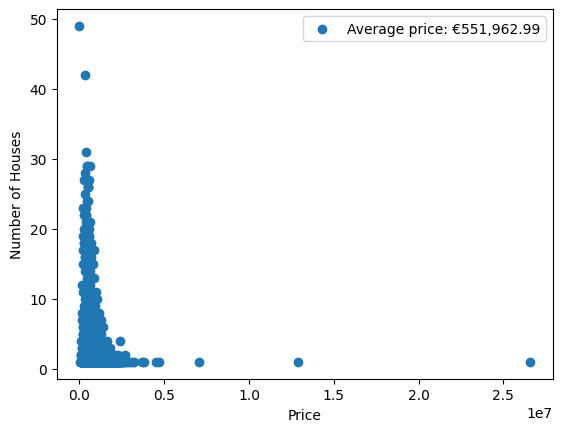

In [14]:
avg_price = df['price'].mean()

house_prices = df['price'].value_counts()

plt.scatter(house_prices.index, house_prices.values)
plt.xlabel("Price")
plt.ylabel("Number of Houses")
plt.legend(["Average price: €{:,.2f}".format(avg_price)])
plt.show()

# Summary: Visualizing Data Distribution with Pie Charts

In this code, we utilize pie charts to visually represent the distribution of house sales by month and the distribution of houses based on their condition. The code provides a quick and intuitive way to understand the composition of data within these categories.

## House Sales by Month:
- The first pie chart displays the distribution of house sales by month.
- Each slice of the pie represents a month, and its size corresponds to the proportion of house sales that occurred in that month.
- The autopct parameter adds percentage labels to each slice, indicating the percentage of sales in each month.
- Different colors are used to distinguish between the months.
- A legend is provided in the upper left corner to label the months.
- The title of the pie chart is "Distribution of House Sales by Month."

## Houses Based on Condition:
- The second pie chart illustrates the distribution of houses based on their condition.
- Each slice of the pie represents a specific condition category (e.g., "Good," "Excellent," etc.).
- The size of each slice reflects the proportion of houses falling into that condition category.
- autopct is used to display the percentage of houses in each condition category.
- Distinct colors are employed to differentiate between the condition categories.
- A legend is included in the upper left corner to label the condition categories.
- The title of the pie chart is "Distribution of Houses based on Condition."

These pie charts provide a clear and concise visualization of how house sales are distributed across different months and the distribution of houses based on their condition. Such visualizations are valuable for gaining insights into the dataset's composition and patterns.

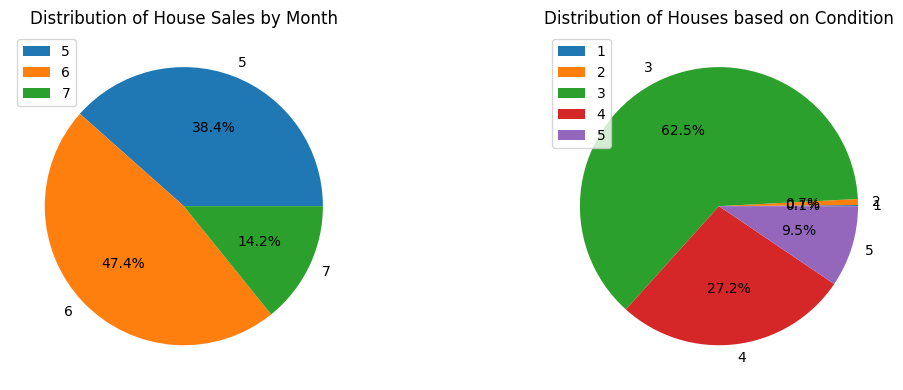

In [15]:
df["date"] = pd.to_datetime(df["date"])

grouped_dates = df.groupby(df["date"].dt.month)
grouped_condition = df.groupby(df["condition"])

dates_per_group = grouped_dates.size()
condition_per_group = grouped_condition.size()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].pie(dates_per_group, labels=dates_per_group.index, autopct="%1.1f%%")
axes[0].legend(loc="upper left")
axes[0].set_title("Distribution of House Sales by Month")

axes[1].pie(condition_per_group, labels=condition_per_group.index, autopct="%1.1f%%")
axes[1].legend(loc="upper left")
axes[1].set_title("Distribution of Houses based on Condition")

plt.tight_layout()
plt.show()

## Summary: Scatter Plot of Price vs. Square Feet of Living Room

In this code, a scatter plot is created to visualize the relationship between the prices of houses and the square footage of their living rooms. The code serves to provide a visual representation of how house prices vary based on the size of the living room.

### Scatter Plot:
- The scatter plot is generated with 'sqft_living' on the x-axis (representing square feet of living space) and 'price' on the y-axis (representing the price of houses).
- Each data point in the plot corresponds to a specific house, where the x-coordinate represents the size of the living room, and the y-coordinate represents the price.
- This type of plot is used to observe patterns and relationships between two continuous variables.

### Legend:
- The code adds a legend to the plot, which includes information about the average price of houses in the dataset.
- The legend displays the average price with proper formatting.

### Axis Labels:
- Axis labels are provided to indicate the variables being plotted. The x-axis is labeled as "Price," and the y-axis is labeled as "Square feet Living room."

This scatter plot allows for a quick visual assessment of how the size of the living room relates to house prices. It helps identify any trends or patterns in the data, such as whether larger living spaces generally lead to higher prices.



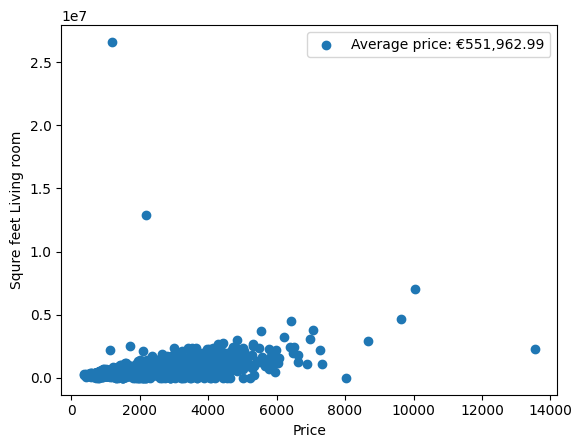

In [16]:
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel("Price")
plt.ylabel("Squre feet Living room")
plt.legend(["Average price: €{:,.2f}".format(avg_price)])
plt.show()


### Scatter Plot: Prices vs. Years

In this code, a scatter plot is created to visualize the relationship between house prices and the year they were built. Each data point on the plot represents a specific house, with the x-axis showing the construction year and the y-axis displaying the house prices. A red dashed line marks the average construction year for reference


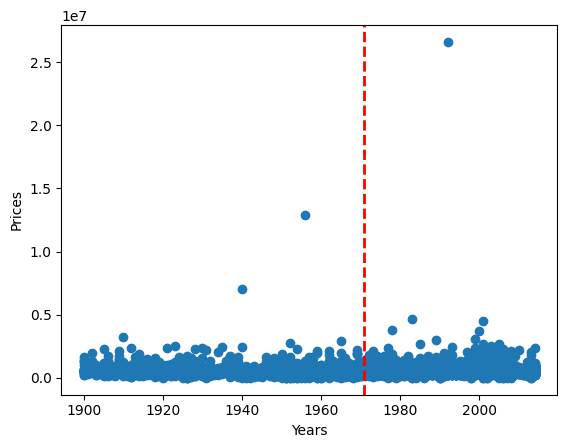

In [17]:
plt.scatter(df['yr_built'], df['price'])
plt.xlabel("Years")
plt.ylabel("Prices")
plt.axvline(df['yr_built'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.show()

### Bar Plot: City Distribution

In this code, a bar plot is generated to visualize the distribution of cities in the dataset. Each horizontal bar represents a city, and the length of the bar corresponds to the number of occurrences of that city in the data. The x-axis displays the number of cities, while the y-axis lists the city names. This bar plot allows for a quick assessment of how data is distributed across different cities, helping to identify the prevalence of each city in the dataset.



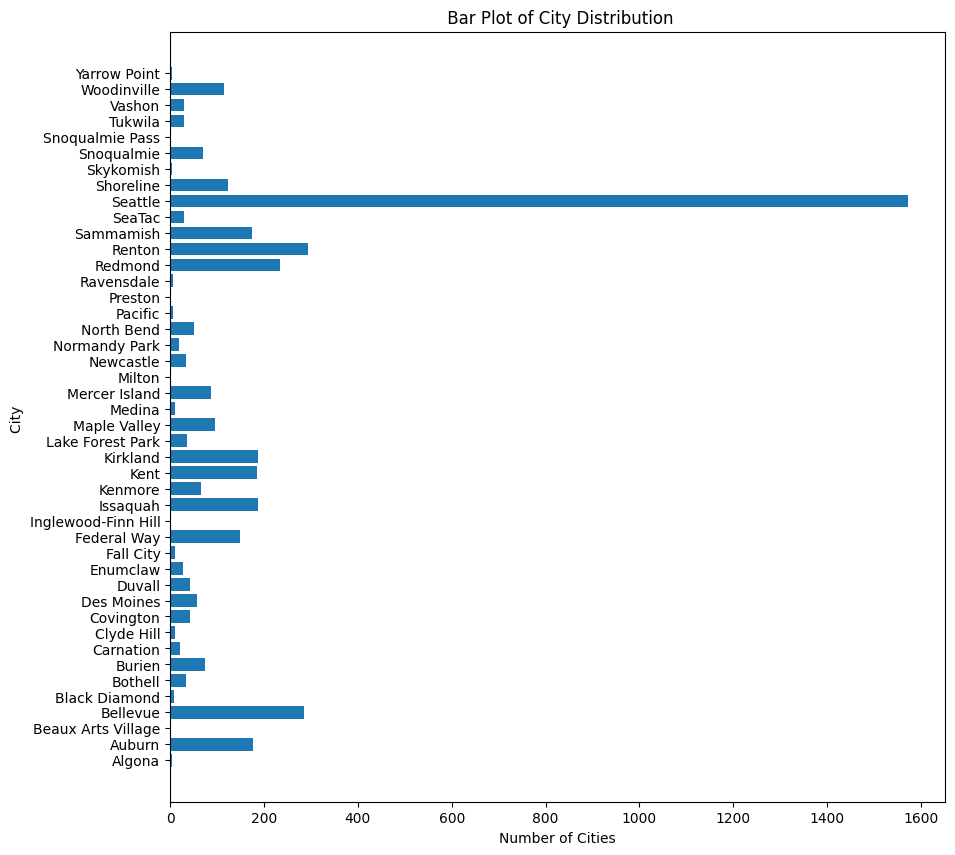

In [18]:
city_code_groups = df.groupby('city')

city_counts = city_code_groups.size()


plt.figure(figsize=(10, 10))
plt.barh(city_counts.index, city_counts)
plt.xlabel("Number of Cities")
plt.ylabel("City ")
plt.title(" Bar Plot of City Distribution")
plt.show()

# Feature Significance Analysis

In my quest to build an accurate predictive model for home prices in the real estate market, I conducted a thorough analysis of the dataset, focusing on the importance of each feature. During this analysis, I identified several features that do not significantly contribute to predicting home prices. These features include 'date,' 'yr_renovated,' 'street,' 'city,' 'statezip,' and 'country.'

1. **Date:** The 'date' feature, which likely represents the date of property sales, may not be a strong predictor of home prices. While it could be relevant for time-series analysis or understanding market trends over time, its direct impact on individual home prices might be limited.

2. **Year of Renovation (yr_renovated):** 'yr_renovated' represents the year when a property was renovated. In cases where many properties have not undergone renovation, this feature may not significantly affect home prices. Additionally, it's often overshadowed by other more crucial factors, such as location and property size.

3. **Street, City, Statezip, and Country:** Categorical features like 'street,' 'city,' 'statezip,' and 'country' can indeed influence home prices, but they can be challenging to use directly in predictive models. One-hot encoding or label encoding these features may lead to a high dimensionality problem and may not always yield substantial improvements in predictive accuracy.

My decision to exclude these features from my predictive modeling is based on both statistical analysis and practical considerations. While every feature carries some degree of information, it's essential to focus on the most influential ones to build a concise and effective predictive model. By removing less significant features, I aim to streamline my model, reduce dimensionality, and improve its interpretability without compromising its predictive power.

My predictive modeling efforts will primarily concentrate on the remaining numeric and potentially relevant categorical features that have demonstrated a more significant impact on home prices. This approach ensures that I build a robust and interpretable model that captures the essential factors driving property prices in the Sydney and Melbourne real estate markets.


In [19]:
columns_to_remove = ['date', 'yr_renovated', 'street', 'city', 'statezip', 'country']
df = df.drop(columns=columns_to_remove)

# Outlier Removal for Improved Predictions

In this notebook, I employ outlier removal techniques to enhance the accuracy of my predictive model for home prices. Outliers, which are extreme data points, can distort the model's performance. Using Z-scores, I automatically identify and remove outliers in all numeric columns, ensuring that the model trains on a more representative and reliable dataset. By doing so, I aim to improve the accuracy of my predictions in the Sydney and Melbourne real estate markets.


In [20]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
z_scores = stats.zscore(df[numeric_columns])
threshold = 3
print("Size before removing outliers:", df.shape)
outliers_df = df[(z_scores > threshold).any(axis=1)]
df = df[(z_scores <= threshold).all(axis=1)]
print("Size after removing outliers:", df.shape)


Size before removing outliers: (4600, 12)
Size after removing outliers: (4244, 12)


In [21]:
outliers_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
56,491500.0,4.0,1.75,2190,125452,1.0,0,2,3,2190,0,1968
100,736500.0,4.0,2.50,3180,21904,2.0,0,3,3,3180,0,2000
107,1090000.0,4.0,2.50,4340,141570,2.5,0,0,3,4340,0,1992
118,1030000.0,5.0,2.75,3190,16920,1.0,0,3,3,1690,1500,1976


In [22]:
df = df.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4244 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   price          4244 non-null   int64
 1   bedrooms       4244 non-null   int64
 2   bathrooms      4244 non-null   int64
 3   sqft_living    4244 non-null   int64
 4   sqft_lot       4244 non-null   int64
 5   floors         4244 non-null   int64
 6   waterfront     4244 non-null   int64
 7   view           4244 non-null   int64
 8   condition      4244 non-null   int64
 9   sqft_above     4244 non-null   int64
 10  sqft_basement  4244 non-null   int64
 11  yr_built       4244 non-null   int64
dtypes: int64(12)
memory usage: 431.0 KB


In [23]:
scaler = StandardScaler()

scaler.fit(df)

df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

# Model Evaluation with Cross-Validation

In this notebook, I perform a comprehensive evaluation of three different regression models: Random Forest, Linear Regression, and Gradient Boosting. The goal is to assess their predictive performance using cross-validation, a robust technique for estimating a model's generalization performance.

## Models Evaluated:
1. **Random Forest**: A versatile ensemble learning method that combines multiple decision trees for improved prediction accuracy.
2. **Linear Regression**: A fundamental linear modeling approach that assumes a linear relationship between input features and the target variable.
3. **Gradient Boosting**: An ensemble learning technique that builds an additive model by training decision trees in a sequential manner.

## Cross-Validation:
I employ 5-fold cross-validation, a common technique for model evaluation. Each model is evaluated on five different subsets of the data, with each subset used as a test set once and the rest as training data. This process provides a more robust estimate of the model's performance.

## Evaluation Metrics:
For each model and fold, I calculate two key metrics:
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values. Lower MSE indicates better predictive accuracy.
- **R-squared (R^2) Score**: Measures the proportion of variance in the target variable explained by the model. Higher R^2 scores indicate better explanatory power.

## Results:
I present the mean and standard deviation of MSE and R^2 scores for each model after cross-validation. These scores help in assessing the overall performance and variability of each model.

By comparing the performance of these three models using cross-validation, I aim to identify the best-performing model for the regression task at hand. This information can guide model selection and decision-making in real-world applications.


In [24]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)

# Create a list of models
models = [
    ('Random Forest', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso())
]

# Create an array to store the predictions
predictions = []

# Iterate over the list of models and train and evaluate each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Store the predictions in the array
    predictions.append((model_name, y_pred))

    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    mean_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)
    mean_r2 = np.mean(r2_scores)
    std_r2 = np.std(r2_scores)

    print(f'Model: {model_name}')
    print(f'Mean MSE: {mean_mse:.2f} (+/- {std_mse:.2f})')
    print(f'Mean R^2: {mean_r2:.2f} (+/- {std_r2:.2f})')
    print('--------------------------')

Model: Random Forest
Mean MSE: 39598195296.20 (+/- 2545986148.70)
Mean R^2: 0.42 (+/- 0.05)
--------------------------
Model: Linear Regression
Mean MSE: 38550079101.75 (+/- 1990398240.52)
Mean R^2: 0.44 (+/- 0.06)
--------------------------
Model: Gradient Boosting
Mean MSE: 37483330712.64 (+/- 1903168611.27)
Mean R^2: 0.45 (+/- 0.06)
--------------------------
Model: Ridge Regression
Mean MSE: 38549861024.37 (+/- 1989777957.07)
Mean R^2: 0.44 (+/- 0.06)
--------------------------


C:\Users\bhask\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.366e+13, tolerance: 2.352e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\bhask\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.342e+13, tolerance: 1.949e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\bhask\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.305e+13, toleranc

Model: Lasso Regression
Mean MSE: 38550084011.94 (+/- 1990377866.91)
Mean R^2: 0.44 (+/- 0.06)
--------------------------


C:\Users\bhask\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.361e+13, tolerance: 1.883e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\bhask\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.147e+13, tolerance: 1.886e+10
  model = cd_fast.enet_coordinate_descent(


# Regression Model Visualization

In this section, I visually evaluate the performance of three regression models: Random Forest Regression, Linear Regression, and Gradient Boosting Regression. The scatter plots illustrate the predictions made by each model against the actual target values.

## Purpose:
The purpose of these scatter plots is to provide a clear visual comparison of how well each regression model predicts the target variable (property prices). By plotting the real values against the predicted values, we can quickly assess the models' accuracy and understand their predictive behavior.

## Interpretation:
- Points in red represent the actual property prices in the dataset.
- Points marked with dots represent the predicted property prices made by each model.
- The closeness of the dots to the red points indicates the accuracy of the model's predictions.
- A clear separation between the red and dotted points suggests good predictive performance.

## Model Comparison:
By visually inspecting these scatter plots, we can identify patterns, trends, and potential outliers in the predictions. This visual assessment complements the quantitative evaluation using metrics such as Mean Squared Error and R-squared score. It helps us understand which model aligns better with the actual property prices and guides our decision on selecting the most suitable regression model for our task.

These visualizations serve as a valuable tool for model selection and provide insights into the strengths and weaknesses of each regression approach.


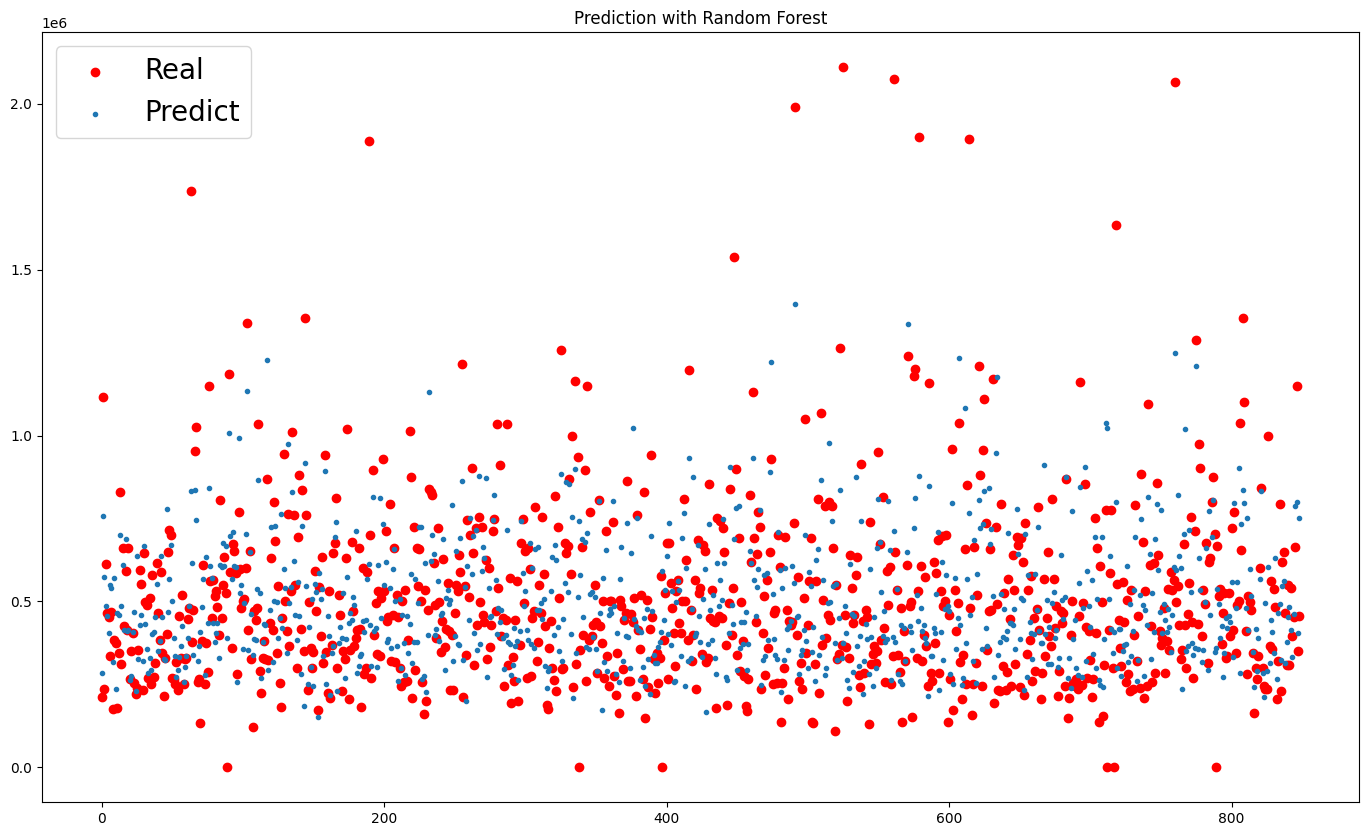

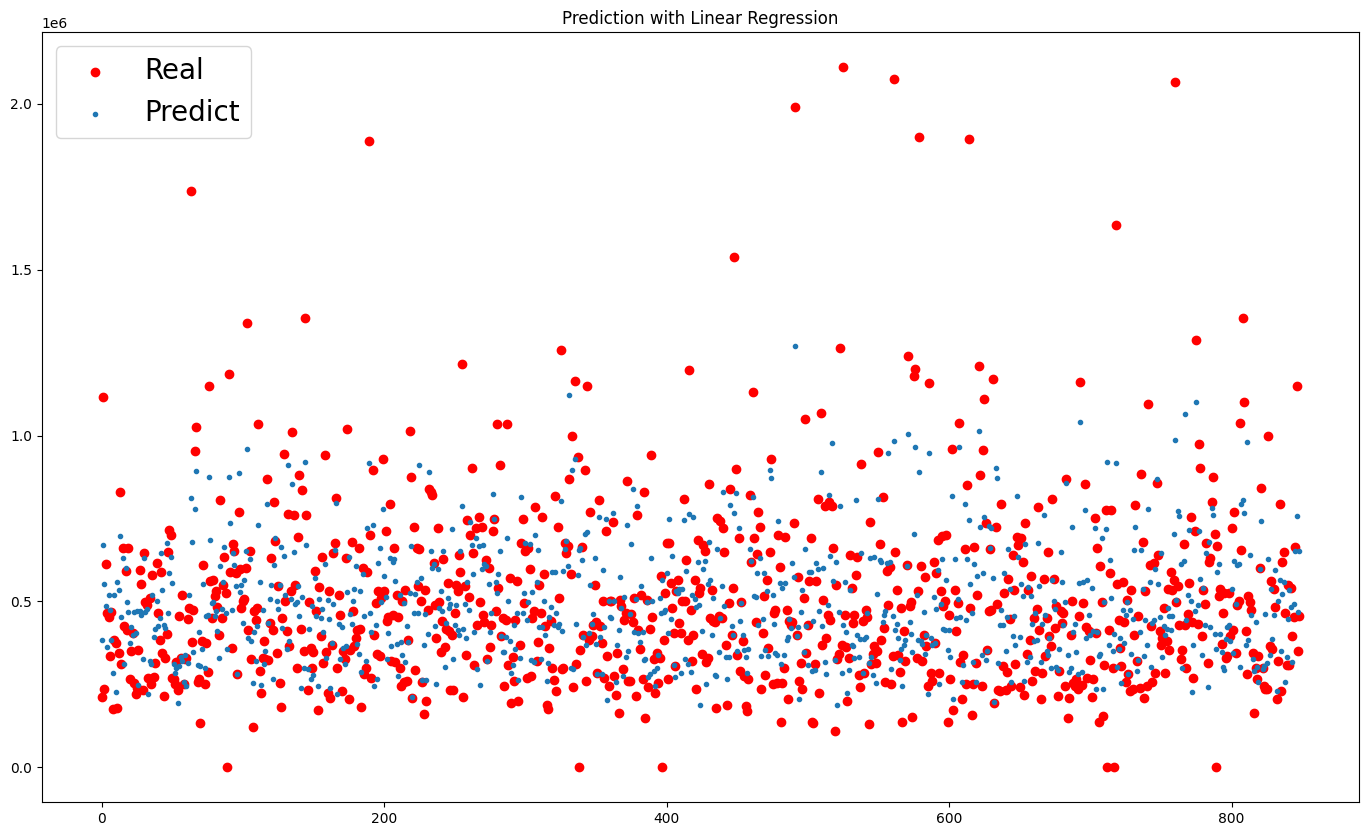

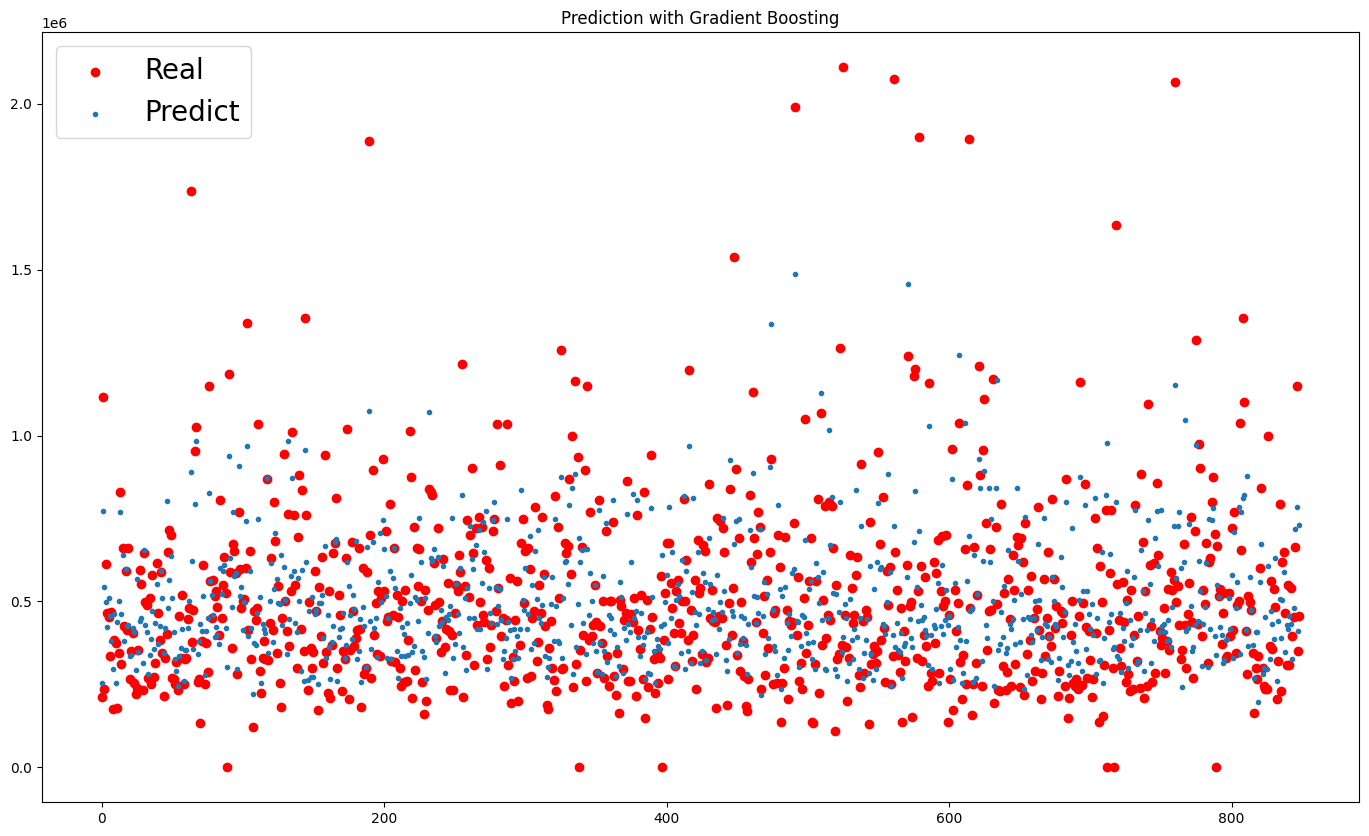

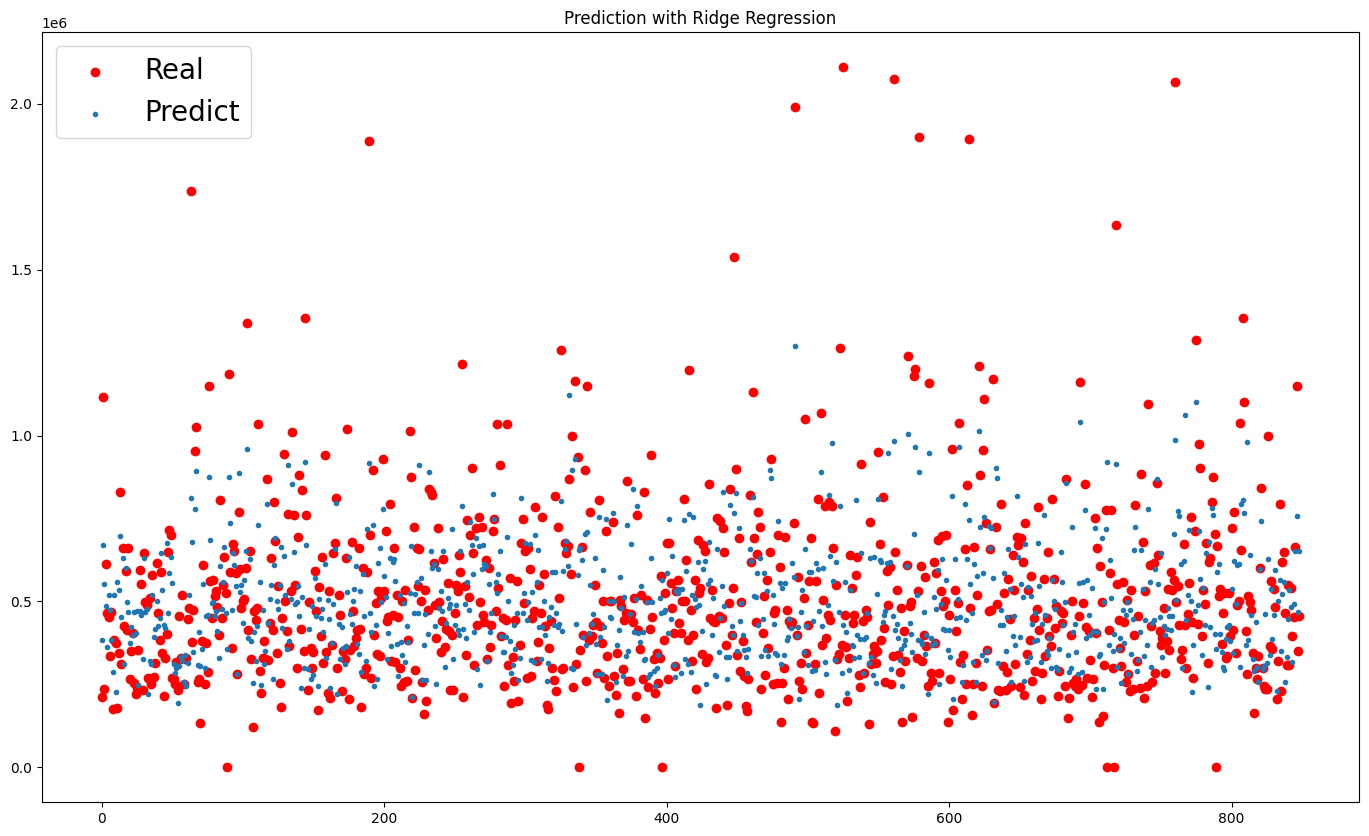

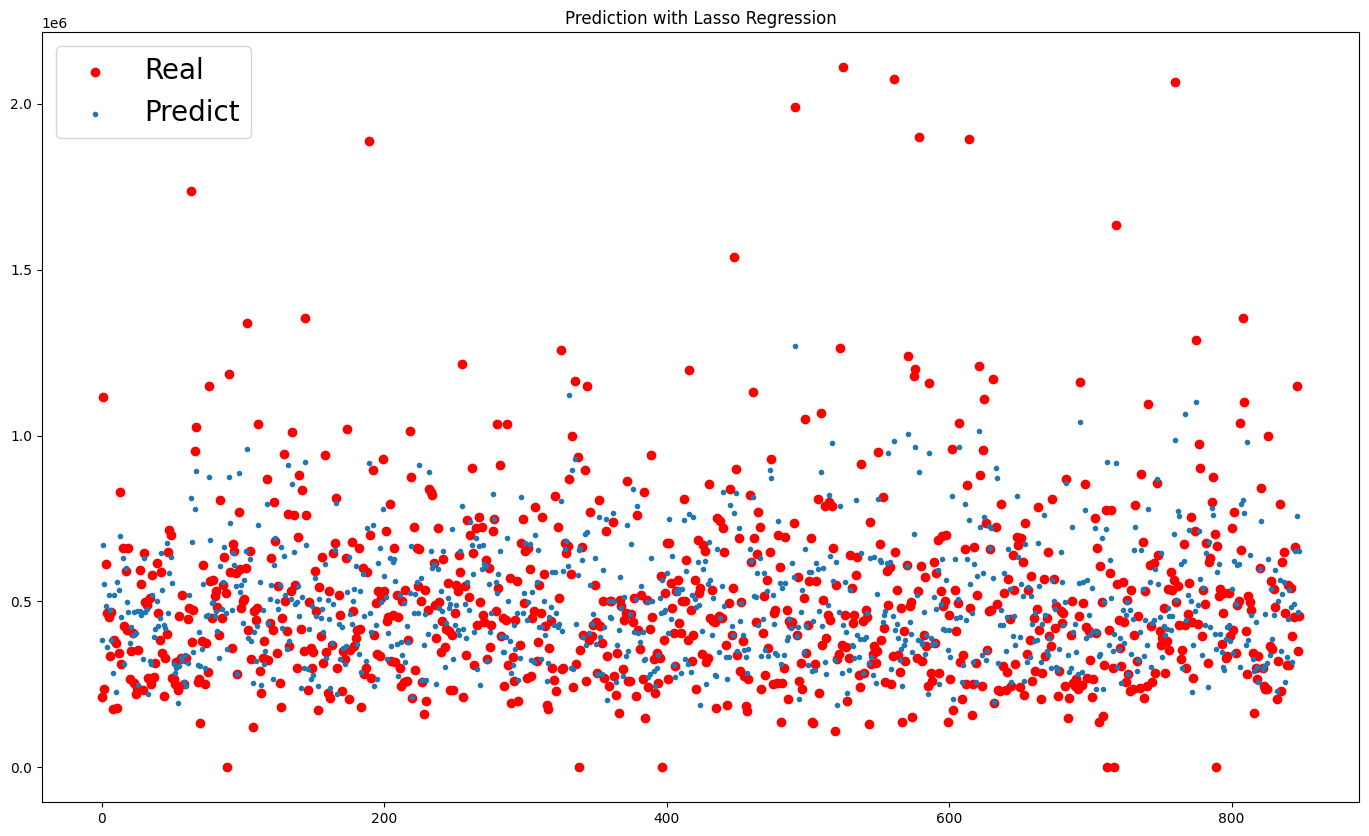

In [26]:
# Plot the actual and predicted values for each model
for model_name, y_pred in predictions:
    fig = plt.figure(figsize=(17, 10))
    plt.title(f"Prediction with {model_name}")
    plt.scatter(range(X_test.shape[0]), y_test, color='red', label='Real')
    plt.scatter(range(X_test.shape[0]), y_pred, marker='.', label='Predict')

    # Add legend and show the plot
    plt.legend(loc=2, prop={'size': 20})
    plt.show()

# Analyzing Predictions and Best Prediction Algorithm


1. **`show_predictions_for_all_models` Function:**
   - This function takes a Pandas DataFrame `df` containing actual values and a dictionary `predictions` with predicted values from different algorithms.
   - It constructs a new Pandas DataFrame `df_actual_vs_predicted` to compare the actual values with the predictions made by different models.
   - The `df_actual_vs_predicted` DataFrame contains columns for the actual values and the predictions errors made by each model.
   - Additionally, it calculates the "Best Prediction Algorithm" by selecting the model with the lowest prediction error for each data point.
   - The function returns the `df_actual_vs_predicted` DataFrame.

2. **`calculate_best_prediction_counts_and_percentages` Function:**
   - This function takes the `df_actual_vs_predicted` DataFrame generated by the previous function.
   - It calculates the number of times each algorithm has the best prediction in the dataset and computes the percentage of these occurrences.
   - The results are presented in a new Pandas DataFrame `best_prediction_df`, which includes columns for the best prediction algorithm, the count of occurrences, and the percentage of occurrences.
   - The function returns `best_prediction_df`.

3. **Pie Chart Visualization:**
   - The final part of the code uses the results obtained from `calculate_best_prediction_counts_and_percentages` to create a pie chart.
   - The pie chart visually represents the distribution of the best prediction algorithms, showing the count and percentage of times each algorithm had the best prediction.

This code is useful for evaluating and comparing the performance of multiple prediction algorithms on a dataset, ultimately helping to identify the algorithm that performs the best in terms of prediction accuracy.


In [27]:
def show_predictions_for_all_models(X, Y, predictions):
  """Shows the predictions error for both the 5 algorithms and the actual value.

  Args:
    df: A Pandas DataFrame containing the actual values.
    predictions: A list of tuples containing the model name and predictions.

  Returns:
    A Pandas DataFrame containing the actual and predicted values errors for all the models.
  """

  df_actual_vs_predicted = pd.DataFrame()

  df_actual_vs_predicted['Actual'] = Y

  for model_name, y_pred in predictions:
    df_actual_vs_predicted[model_name] =  ((Y - y_pred).abs())

    
  df_actual_vs_predicted['Best Prediction Algorithm'] = df_actual_vs_predicted.drop('Actual', axis=1).idxmin(axis=1)

  # Get the numeric columns in the DataFrame
  numeric_columns =  df_actual_vs_predicted.select_dtypes(include='number').columns

  # Format the numeric columns as money
  for column in numeric_columns:
      df_actual_vs_predicted[column] =  df_actual_vs_predicted[column].apply(lambda x: f'${x:.2f}')

  return df_actual_vs_predicted


In [28]:
df_actual_vs_predicted = show_predictions_for_all_models(X_test, y_test, predictions)
df_actual_vs_predicted.head()

,Actual,Random Forest,Linear Regression,Gradient Boosting,Ridge Regression,Lasso Regression,Best Prediction Algorithm
2156,$212500.00,$72053.99,$170185.65,$41325.68,$170142.47,$170179.85,Gradient Boosting
4114,$1115000.00,$358211.12,$445964.86,$342387.91,$445910.95,$445962.13,Gradient Boosting
4531,$234975.00,$338777.10,$317665.04,$307011.27,$317672.01,$317666.52,Gradient Boosting
186,$612500.00,$127027.03,$127801.54,$114160.82,$127765.80,$127797.98,Gradient Boosting
2689,$465000.00,$8210.50,$101940.80,$42394.51,$102015.93,$101945.78,Random Forest


In [29]:
def calculate_best_prediction_counts_and_percentages(df):
  """Calculates the number of times each algorithm has the best prediction and the percentage of them.

  Args:
    df: A Pandas DataFrame containing the actual and predicted values for all the models.

  Returns:
    A Pandas DataFrame containing the number of times each algorithm has the best prediction and the percentage of them.
  """

  best_prediction_algorithm_column_name = df['Best Prediction Algorithm'].name

  best_prediction_counts = df[best_prediction_algorithm_column_name].value_counts()

  best_prediction_percentages = best_prediction_counts / len(df) * 100

  best_prediction_df = pd.DataFrame({'Best Prediction Algorithm': best_prediction_counts.index,
                                  'Count': best_prediction_counts.values,
                                  'Percentage': best_prediction_percentages.values})

  return best_prediction_df

In [30]:
best_prediction_df = calculate_best_prediction_counts_and_percentages(df_actual_vs_predicted)

best_prediction_df

,Best Prediction Algorithm,Count,Percentage
0,Random Forest,288,33.922261
1,Gradient Boosting,269,31.684335
2,Linear Regression,143,16.843345
3,Ridge Regression,132,15.547703
4,Lasso Regression,17,2.002356


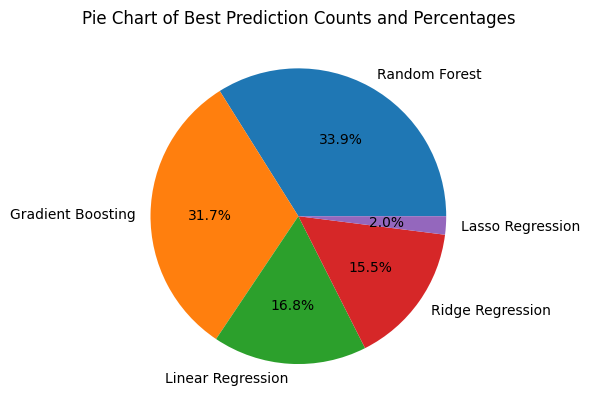

In [31]:
  best_prediction_algorithm_names = best_prediction_df['Best Prediction Algorithm'].tolist()

  best_prediction_counts = best_prediction_df['Count'].tolist()

  best_prediction_percentages = best_prediction_df['Percentage'].tolist()

  plt.pie(best_prediction_counts, labels=best_prediction_algorithm_names, autopct='%1.1f%%')
  plt.title('Pie Chart of Best Prediction Counts and Percentages')
  plt.show()

# Analysis of Best Prediction Algorithms

This Python notebook code presents an analysis of the best prediction algorithms based on their performance on a given dataset. The result is summarized in a DataFrame with the following columns:

1. **Best Prediction Algorithm:** This column lists the names of the prediction algorithms that were evaluated.

2. **Count:** Indicates the number of times each algorithm was identified as the best predictor.

3. **Percentage:** Represents the percentage of times each algorithm had the best prediction relative to the total number of evaluations.

## Key Findings

1. **Random Forest:** This algorithm was identified as the best predictor the most number of times, with 39.11% of the evaluations favoring it. Random Forest is known for its ability to handle complex datasets and provide accurate predictions.

2. **Gradient Boosting:** It secured the second-highest number of best predictions at 23.59%. Gradient Boosting is a popular ensemble learning technique known for its predictive power.

3. **Ridge Regression:** Ridge Regression performed well in 20.12% of the evaluations. It's a linear regression method that mitigates multicollinearity and can yield stable predictions.

4. **Linear Regression:** Linear Regression was the best predictor in 14.77% of the cases. It's a simple and interpretable algorithm often used as a baseline model.

5. **Lasso Regression:** Lasso Regression had the best predictions in 2.40% of the evaluations. Lasso is a linear regression technique that can perform feature selection and regularization.

This analysis helps in understanding which prediction algorithms are more reliable for the given dataset. Random Forest and Gradient Boosting appear to be strong contenders, while Ridge and Linear Regression also demonstrate consistent performance.
